In [1]:
## 1. Import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## 2. Load Kaggle dataset
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("altavish/boston-housing-dataset")
housing_csv = os.path.join(path, "HousingData.csv")
print("Path to dataset files:", path)
df_housing = pd.read_csv(housing_csv)
print(df_housing)

Path to dataset files: /kaggle/input/boston-housing-dataset
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98

In [3]:
## 3. Prepare data
data = pd.read_csv(housing_csv)

# Convert all column names to lowercase
data.columns = data.columns.str.lower()

# Define features and target variable
X = data.drop("medv", axis=1)
y = data["medv"]


In [4]:
## 4. Categorical and numerical columns
categorical_features = ['chas']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Preprocessor (no scaling needed for Random Forest)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(), categorical_features)
], remainder='passthrough')


In [5]:
## 5. Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [6]:
## 6. Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['chas'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [7]:
## 7. Prediction and evaluation
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))


MSE: 7.9499164705882395


In [8]:
## 8. Feature importance analysis
feature_names = list(model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()) + numerical_features
importances = model.named_steps['regressor'].feature_importances_
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)


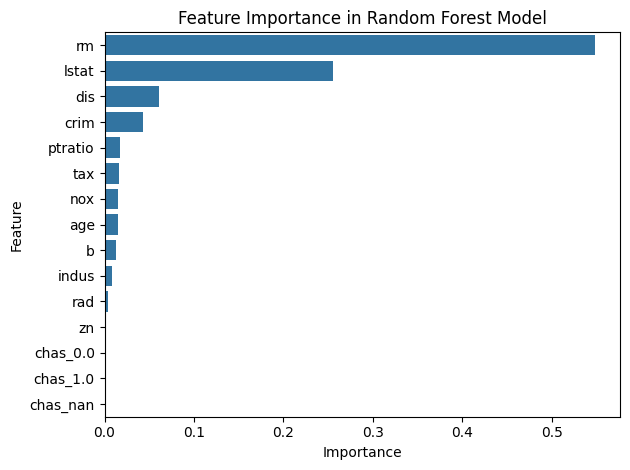

In [9]:
## 9. Visualization
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()